In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append('../src')

In [4]:
from d00_utils.db_utils import dbReadWriteClean, dbReadWriteViews
io_clean = dbReadWriteClean()
io_views = dbReadWriteViews()

/home/ubuntu/anaconda3/envs/yoni/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [5]:
def get_recommendation(row):
    return 'normal' if row['value'] >= 60 else 'abnormal' if row['value'] <= 40 else 'greyzone'

In [6]:
measurement_abstract_rpt_df = io_clean.get_table("measurement_abstract_rpt")
print(measurement_abstract_rpt_df.shape)
measurement_abstract_rpt_df.head()

(1568351, 5)


,studyidk,measabstractnumber,name,value,unitname
0,2882,2,(P1/2t)AVM,2.491754,cm2
1,2882,12,Area TSVI,3.606348,cm2
2,2882,43,FE(el-ps4),37.032087,%
3,2882,46,FE(MDD-ps4),35.095355,%
4,2882,125,P1/2t VM,88.291224,ms


In [7]:
measurement_abstract_rpt_df['name'].value_counts()

ASC                        22447
Altura (unidad métrica)    21505
Peso (unidad métrica)      21478
IMC                        21447
ASC (Haycock)              21438
                           ...  
LA Length_phl                  1
Tmsv 16-DIF (ms)               1
Vmáx E VT                      1
Diámetro de CIA                1
Tmsv 6-DIF (ms)                1
Name: name, Length: 362, dtype: int64

In [8]:
filter_df = measurement_abstract_rpt_df

In [9]:
filter_df = filter_df[filter_df['name'].str.contains('FE')]
filter_df = filter_df[filter_df['value']>=0]
print(filter_df.shape)
filter_df.head()

(85719, 5)


,studyidk,measabstractnumber,name,value,unitname
2,2882,43,FE(el-ps4),37.032087,%
3,2882,46,FE(MDD-ps4),35.095355,%
32,2915,42,FE(cúbico),76.509059,%
33,2915,51,FE(Teich),68.886942,%
48,2966,43,FE(el-ps4),42.469430,%


In [10]:
len(filter_df)/len(measurement_abstract_rpt_df)

0.05465549484777323

In [11]:
filter_df['name'].value_counts()

FE(MDD-ps4)             17222
FE(el-ps4)              16332
FE(Teich)               11741
FE(cúbico)              11736
FE(MDD-ps2)              9476
FE(el-ps2)               9107
FE(MDD-bp)               8938
FE (Bi-Plane) (aCMQ)      591
FE A4C (aCMQ)             262
FE (HM)_phl               250
FEVI Bipl                  49
FE(MDD-bp)esf              12
FE_3D-Vol.                  3
Name: name, dtype: int64

In [12]:
filter_df = filter_df[filter_df['name'].str.contains('ps4')]
print(filter_df.shape)
filter_df.head()

(33554, 5)


,studyidk,measabstractnumber,name,value,unitname
2,2882,43,FE(el-ps4),37.032087,%
3,2882,46,FE(MDD-ps4),35.095355,%
48,2966,43,FE(el-ps4),42.469430,%
49,2966,46,FE(MDD-ps4),47.570583,%
154,5898,51,FE(el-ps4),29.178381,%


In [13]:
len(filter_df)/len(measurement_abstract_rpt_df)

0.02139444550358944

In [19]:
frames_by_volume_mask_df = io_views.get_table('frames_by_volume_mask')
print(frames_by_volume_mask_df.shape)
frames_by_volume_mask_df.head()

(464634, 9)


,instanceidk,indexinmglist,studyidk,frame,view_name,view_exists,view_only,ventricle_only,cycle_only
0,57164,0,2882,8,a4c_ven_ed,False,a4c,ven,ed
1,57164,1,2882,15,a4c_ven_ed,True,a4c,ven,ed
2,58207,0,2966,1,a4c_ven_ed,False,a4c,ven,ed
3,58207,1,2966,8,a4c_ven_ed,True,a4c,ven,ed
4,102950,0,5898,17,a4c_ven_ed,True,a4c,ven,ed


In [23]:
instances_w_labels_df = io_views.get_table('instances_w_labels')
print(instances_w_labels_df.shape)
instances_w_labels_df.head()

(25971, 5)


,sopinstanceuid,filename,instanceidk,view,studyidk
0,1.2.840.113663.1500.1.365900332.3.4.20120703.9...,8Z0BWX0M,696109,plax,39531
1,1.2.840.113663.1500.1.365900332.3.7.20120703.9...,8Z0BWZGH,696112,a4c,39531
2,1.2.840.113663.1500.1.365900332.3.1.20120703.9...,8Z0BXKCB,696140,plax,39533
3,1.2.840.113663.1500.1.365900332.3.14.20120703....,8Z0BXYUW,696157,plax,39533
4,1.2.840.113663.1500.1.365900332.3.8.20120704.9...,8ZGVB44R,696422,plax,39552


In [31]:
filter_df = filter_df[filter_df['studyidk'].isin(frames_by_volume_mask_df['studyidk'].unique())]

In [16]:
filter_df['recommendation'] = filter_df.apply(get_recommendation, axis=1)

In [14]:
len(filter_df['studyidk'].unique())

17222

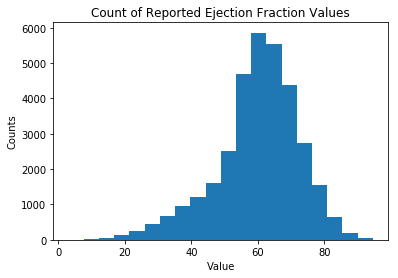

In [15]:
plt.title(f'Count of Reported Ejection Fraction Values')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.hist(filter_df['value'], bins=20);

In [17]:
filter_df['recommendation'].value_counts()

normal      18419
greyzone    12513
abnormal     2622
Name: recommendation, dtype: int64

In [ ]:
filter_df = filter_df[filter_df['studyidk'].isin(frames_by_volume_mask_df['studyidk'].unique())]

In [18]:
filter_df['recommendation'].value_counts()/filter_df['recommendation'].value_counts().sum()

normal      0.548936
greyzone    0.372921
abnormal    0.078143
Name: recommendation, dtype: float64

In [29]:
filter_df.head()

,studyidk,measabstractnumber,name,value,unitname,recommendation
2,2882,43,FE(el-ps4),37.032087,%,abnormal
3,2882,46,FE(MDD-ps4),35.095355,%,abnormal
48,2966,43,FE(el-ps4),42.469430,%,greyzone
49,2966,46,FE(MDD-ps4),47.570583,%,greyzone
154,5898,51,FE(el-ps4),29.178381,%,abnormal


In [32]:
filter_df.shape

(32814, 6)

In [25]:
len(filter_df['studyidk'].unique())

17222

In [26]:
len(merge_df['studyidk'].unique())

16484

In [28]:
len(merge_df['instanceidk'].unique())

31340

In [23]:
merge_df['name'].value_counts()

FE(MDD-ps4)    447654
FE(el-ps4)     445716
Name: name, dtype: int64

In [70]:
measurement_abstract_rpt_df = measurement_abstract_rpt_df[['studyidk', 'measabstractnumber', 'name']]
measurement_abstract_rpt_df.head()

,studyidk,measabstractnumber,name
0,2882,2,(P1/2t)AVM
1,2882,12,Area TSVI
2,2882,43,FE(el-ps4)
3,2882,46,FE(MDD-ps4)
4,2882,125,P1/2t VM


In [64]:
a_measgraphref_df = io_clean.get_table("a_measgraphref")
print(a_measgraphref_df.shape)
a_measgraphref_df.head()

/home/ubuntu/anaconda3/envs/yoni/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(858255, 10)


,studyidk,measabstractnumber,meassequence,instanceidk,indexinmglist,value,howentered,srinstanceidk,imagesopinstanceuid,measurementuid
0,2882,187,0,57164,0,28.242271,0,,,
1,2882,188,0,57164,0,7.897812,0,,,
2,2882,189,0,57164,0,85.725750,0,,,
3,2882,190,0,57164,0,87.190031,0,,,
4,2882,191,0,57164,1,36.654466,0,,,


In [69]:
merge_df = measurement_abstract_rpt_df.merge(a_measgraphref_df, on=['studyidk', 'measabstractnumber'])
print(merge_df.shape)
merge_df.head()

(858255, 11)


,studyidk,measabstractnumber,name,meassequence,instanceidk,indexinmglist,value,howentered,srinstanceidk,imagesopinstanceuid,measurementuid
0,2882,187,AVIts ap4,0,57164,0,28.242271,0,,,
1,2882,188,DVIts ap4,0,57164,0,7.897812,0,,,
2,2882,189,VTS(el-ps4),0,57164,0,85.725750,0,,,
3,2882,190,VTS(MDD-ps4),0,57164,0,87.190031,0,,,
4,2882,191,AVItd ap4,0,57164,1,36.654466,0,,,


In [71]:
merge_df = merge_df[['studyidk', 'instanceidk', 'indexinmglist', 'meassequence', 'name', 'value', 'howentered']]
merge_df.head()

,studyidk,instanceidk,indexinmglist,meassequence,name,value,howentered
0,2882,57164,0,0,AVIts ap4,28.242271,0
1,2882,57164,0,0,DVIts ap4,7.897812,0
2,2882,57164,0,0,VTS(el-ps4),85.725750,0
3,2882,57164,0,0,VTS(MDD-ps4),87.190031,0
4,2882,57164,1,0,AVItd ap4,36.654466,0


In [72]:
filter_df = merge_df

In [73]:
filter_df = filter_df[filter_df['name'].str.contains('FE')]
filter_df = filter_df[filter_df['value']>=0]
print(filter_df.shape)
filter_df.head()

(1107, 7)


,studyidk,instanceidk,indexinmglist,meassequence,name,value,howentered
29153,41874,16,-1,0,FE_3D-Vol.,53.268799,6
48083,49081,19,-1,0,FE_3D-Vol.,75.929565,6
64831,53772,16,-1,0,FE_3D-Vol.,69.825066,6
193292,72598,-1,-1,0,FE (Bi-Plane) (aCMQ),66.199997,4
219184,74045,-1,-1,0,FE (Bi-Plane) (aCMQ),63.299999,4


In [ ]:
filter_df['howentered'].value_counts()

In [32]:
filter_df.head()

,studyidk,measabstractnumber,name,value,unitname,recommendation
2,2882,43,FE(el-ps4),37.032087,%,abnormal
3,2882,46,FE(MDD-ps4),35.095355,%,abnormal
48,2966,43,FE(el-ps4),42.469430,%,greyzone
49,2966,46,FE(MDD-ps4),47.570583,%,greyzone
154,5898,51,FE(el-ps4),29.178381,%,abnormal
